# III. Model Selection
## Assignment 2
### Model Selection on Climate Change on Crop

### **Step 1: Define the Problem**
We create frame different types of machine learning tasks:
- **Regression**: Predicting a continuous variable like **Crop Yield** based on **Temperature**, **Precipitation**, etc.
- **Classification**: Classifying the type of **Extreme Weather Event** or **Soil Health** levels based on weather conditions.
- **Clustering**: Grouping similar data points based on conditions like **Temperature**, **CO2 Levels**, and **Precipitation**.

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('processed_climate_change_data.csv')

# Display the first few rows of the dataset
df.head()

# Get a summary of the dataset to understand its structure
df.info()

# Get basic statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Temperature             1000 non-null   int64 
 1   Precipitation           1000 non-null   int64 
 2   CO2 Levels              1000 non-null   int64 
 3   Crop Yield              1000 non-null   int64 
 4   Soil Health             1000 non-null   int64 
 5   Extreme Weather Events  1000 non-null   object
 6   Crop Disease Incidence  1000 non-null   object
 7   Water Availability      1000 non-null   object
 8   Food Security           1000 non-null   object
 9   Economic Impact         1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


,Temperature,Precipitation,CO2 Levels,Crop Yield,Soil Health
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,25.129000,47.90500,401.983000,545.497000,5.51700
std,14.920489,29.81904,57.153664,260.779723,2.84672
min,0.000000,0.00000,300.000000,100.000000,1.00000
25%,12.000000,21.00000,355.000000,320.000000,3.00000
50%,25.000000,48.00000,404.000000,546.000000,6.00000
75%,39.000000,72.00000,452.000000,768.250000,8.00000
max,50.000000,100.00000,500.000000,1000.000000,10.00000


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select the features and target
X = df[['Temperature', 'Precipitation', 'CO2 Levels']]
y = df['Crop Yield']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
reg_model = LinearRegression()

# Train the model on the training data
reg_model.fit(X_train, y_train)

# Predict on the test data
y_pred = reg_model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 68964.14880608246


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features and target (assuming 'Extreme Weather Events' is the target)
X = df[['Temperature', 'Precipitation', 'CO2 Levels']]
y = df['Extreme Weather Events']

# Convert categorical target to numerical values (if not already done)
y = pd.factorize(y)[0]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
clf_model = LogisticRegression(max_iter=200)

# Train the model
clf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = clf_model.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.22333333333333333


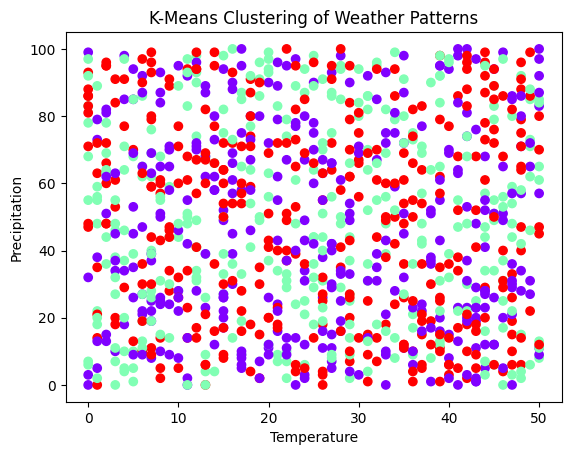

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
X = df[['Temperature', 'Precipitation', 'CO2 Levels']]

# Initialize KMeans with a chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X)

# Get cluster labels
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
df['Cluster'] = labels

# Visualize the clusters
plt.scatter(df['Temperature'], df['Precipitation'], c=labels, cmap='rainbow')
plt.xlabel('Temperature')
plt.ylabel('Precipitation')
plt.title('K-Means Clustering of Weather Patterns')
plt.show()


In [13]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Ridge Regression
ridge_model = Ridge(alpha=1.0)

# Train the model
ridge_model.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge}, R²: {r2_ridge}")


Ridge Regression - MSE: 1.1768491578005433, R²: -0.012353037563550107


In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Polynomial Features Transformation
poly = PolynomialFeatures(degree=2)  # You can experiment with different degrees
X_poly = poly.fit_transform(X_train)

# Polynomial Regression
poly_model = LinearRegression()

# Train the model
poly_model.fit(X_poly, y_train)

# Transform the test set
X_test_poly = poly.transform(X_test)

# Predict on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression - MSE: {mse_poly}, R²: {r2_poly}")


Polynomial Regression - MSE: 1.1946591374430542, R²: -0.027673596592319605
